---
## # Import the Fashion MNIST Datset

[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

In [1]:
import tensorflow as tf
from tensorflow import keras

C:\Users\taufi\Anaconda3\envs\tf_14\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\taufi\Anaconda3\envs\tf_14\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\taufi\Anaconda3\envs\tf_14\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\taufi\Anaconda3\envs\tf_14\lib\site-packages\tensorflow\python\f

In [2]:
tf.__version__

'1.14.0'

In [3]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.fashion_mnist

In [5]:
type(mnist)

tensorflow.python.util.deprecation_wrapper.DeprecationWrapper

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### ## Data Exploration

In [7]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [9]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [10]:
X_train = X_train/255.0
X_test = X_test/255.0

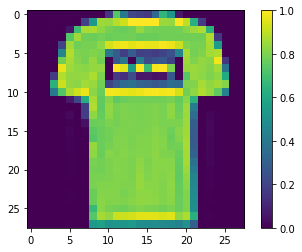

In [11]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar();

---
## # Build Model

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [13]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### ## Model Compilation
- Loss function
- Optimizer
- Metrics

In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [16]:
model.fit(
    X_train,
    y_train,
    epochs=20
)

Epoch 1/20
60000/60000 [==============================] - 4s 58us/sample - loss: 0.4968 - acc: 0.8242
Epoch 2/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3774 - acc: 0.8628
Epoch 3/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3358 - acc: 0.8769
Epoch 4/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3115 - acc: 0.8842
Epoch 5/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2922 - acc: 0.8916
Epoch 6/20
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2797 - acc: 0.8955
Epoch 7/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2640 - acc: 0.9019
Epoch 8/20
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2544 - acc: 0.9046
Epoch 9/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2451 - acc: 0.9081
Epoch 10/20
60000/60000 [==============================] - 3s 54us/sample - loss: 

---
## # Evaluate Model

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
y_pred = model.predict_classes(X_test)

In [19]:
print("Akurasi terhadap data test =>", accuracy_score(y_test, y_pred), "%")

Akurasi terhadap data test => 0.8873 %
